In [2]:
import pandas as pd
df=pd.read_csv('kc_house_data.csv',parse_dates=['date'])


In [13]:
df.info()
df.drop(columns='id',inplace=True)
df.drop(columns='zipcode',inplace=True)
df.isnull().sum()


In [45]:
#df['pieces']=df['bedrooms']+df['bathrooms']+df['floors']
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

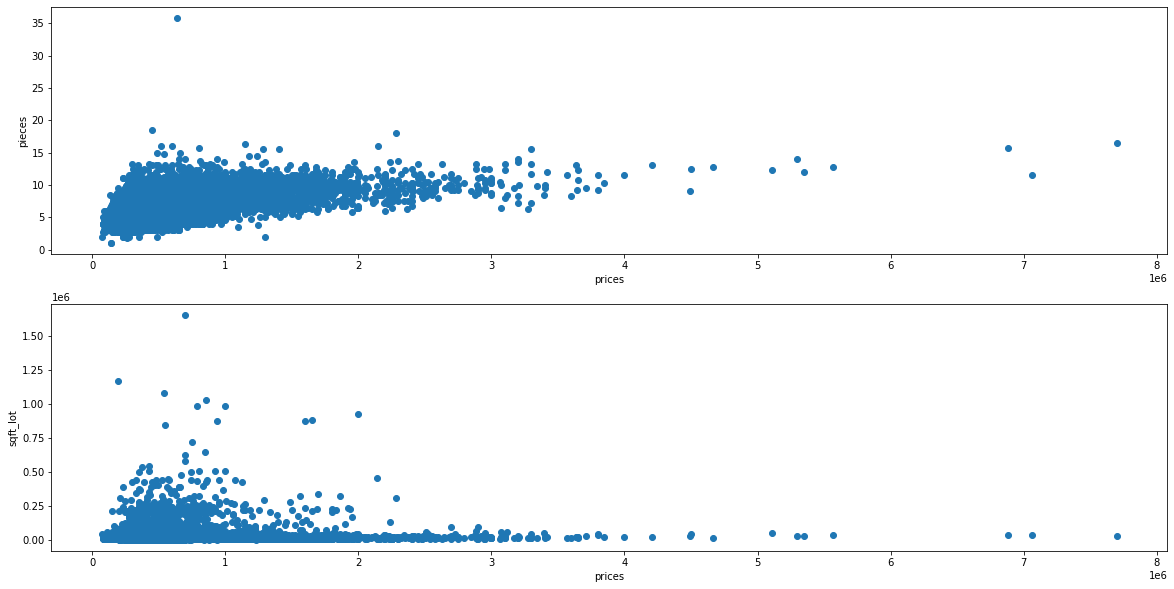

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.xlabel('prices')
plt.ylabel('pieces')
plt.scatter(df['price'],df['pieces'])
plt.subplot(212)
plt.xlabel('prices')
plt.ylabel('sqft_lot')
plt.scatter(df['price'],df['sqft_lot'])

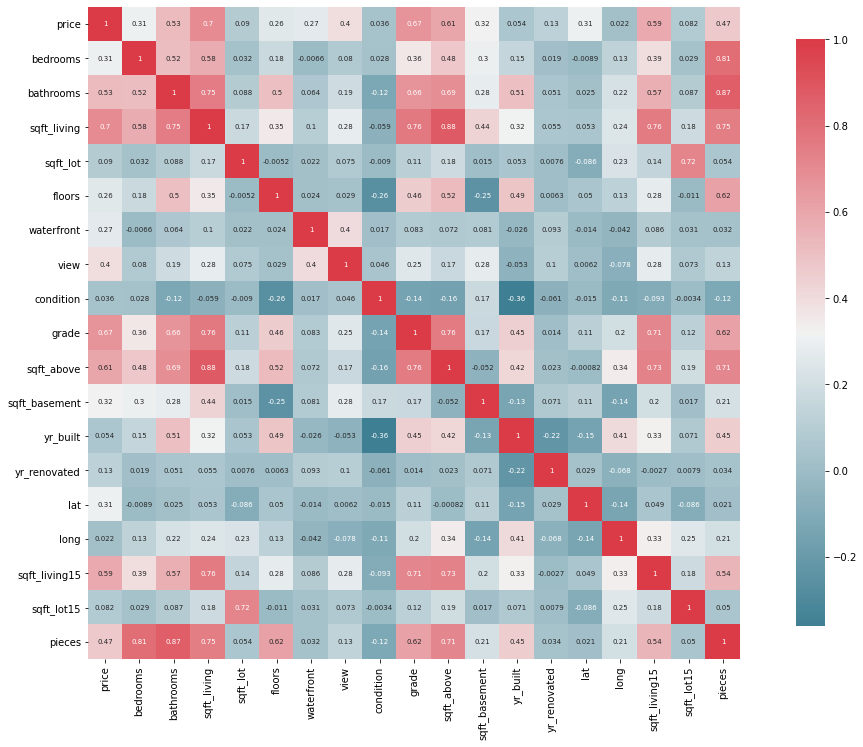

In [47]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 12 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )




    s = sns.heatmap(
        corr, 
        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : 0.9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 7 ,"size":7}

        )
plot_correlation_map(df)

# Je supprime toutes les données dont le taux de corrélation avec le prix est inférieure à 0.2. Je remplace aussi les colonnes 'bedrooms','bathrooms' et 'floors' par leur somme dans la colonne 'pieces'

In [66]:
df.drop(columns='bedrooms',inplace=True)
df.drop(columns='bathrooms',inplace=True)
df.drop(columns='floors',inplace=True)


In [63]:
from scipy.stats import pearsonr
for col in df.columns:
    corr, _ = pearsonr(df['price'],df[col])
    if corr < 0.2:
        df.drop(columns=col,inplace=True)
        
    

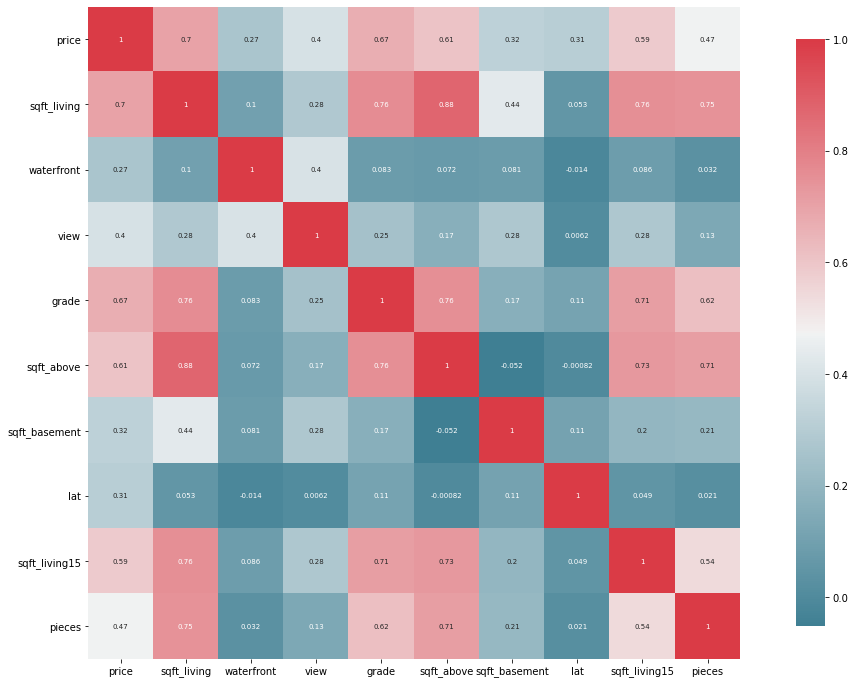

In [67]:
plot_correlation_map(df)

# split your dataset into a training set and a testing set

In [105]:
from sklearn.model_selection import train_test_split
x=df[['sqft_living']]
y=df[['price']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)


# Apply Linear regression to your training set. 

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

model=LinearRegression()
model.fit(x_train,y_train)



LinearRegression()

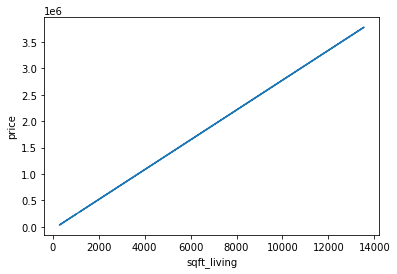

In [109]:
#plt.scatter(x,y)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.plot(x,model.predict(x))

In [95]:
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 64179676631.68388
R squared 0.4879814110728805


# Apply multi-linear regression and compare it to the linear model. 

In [110]:
x=df[['sqft_above','sqft_living','waterfront','view','grade','sqft_basement','lat','sqft_living15','pieces']]
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 39511081300.840996
R squared 0.6847848235393872


# Multilinear regression is better than linear regression because of R squared

# Apply Polynomial regression and compare it to linear and multilinear regression.

In [114]:
from sklearn.preprocessing import PolynomialFeatures

In [119]:
x=df[['sqft_above','sqft_living','waterfront','view','grade','sqft_basement','lat','sqft_living15','pieces']]
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
x_train_fit=poly.fit_transform(x_train)
lg.fit(x_train_fit,y_train)



In [120]:
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  29674789497.017582
R squared:  0.7632577064517129


# Polynomial Regression is better with R squared equal to 0.76